$$ Project:Data-Simulstion $$

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df_mon = pd.read_csv('data/monday.csv', sep= ';',index_col=0)
df_tue = pd.read_csv('data/tuesday.csv', sep= ';',index_col=0)
df_thur = pd.read_csv('data/thursday.csv', sep= ';',index_col=0)
df_wed = pd.read_csv('data/wednesday.csv', sep= ';',index_col=0)
df_fri = pd.read_csv('data/friday.csv', sep= ';',index_col=0)

In [127]:
#number of cusomers on monday
len(df_mon['customer_no'].unique())

1447

In [128]:
df_mon['location'].unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [129]:
mon_sum = df_mon.groupby(by=['location']).count()
tue_sum = df_tue.groupby(by=['location']).count()
thur = df_thur.groupby(by=['location']).count()
wed_sum = df_wed.groupby(by=['location']).count()
fri_sum = df_fri.groupby(by=['location']).count()
mon_sum

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [130]:
#sum of customers in each section from monday until friday:
sum_all = mon_sum + tue_sum + thur + wed_sum + fri_sum
sum_all

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


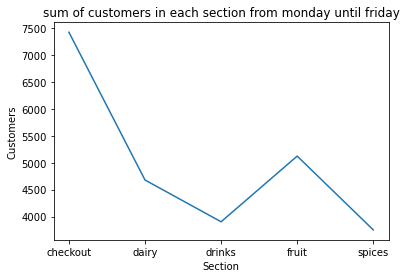

In [131]:
plt.plot(sum_all)
plt.title('sum of customers in each section from monday until friday')
plt.xlabel('Section')
plt.ylabel('Customers')
plt.show()

In [132]:
mon_sum

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [133]:
df_mon['weekday']='monday'
df_tue['weekday']='tuesday'
df_wed['weekday']='wednesday'
df_thur['weekday']='thursday'
df_fri['weekday']='friday'

In [134]:
df = pd.concat([df_mon,df_tue,df_thur,df_wed,df_fri])
df.head()

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-02 07:03:00,2,dairy,monday
2019-09-02 07:04:00,3,dairy,monday
2019-09-02 07:04:00,4,dairy,monday
2019-09-02 07:04:00,5,spices,monday


### Calculate the total number of customers in each section

In [135]:
df_group_one=df.groupby(by="location")["customer_no"].count()
df_group_one

location
checkout    7417
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='location'>

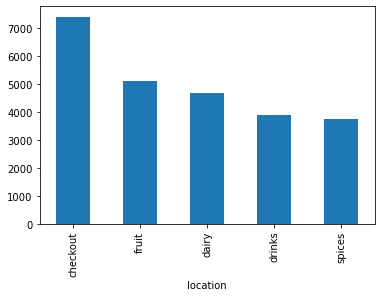

In [136]:
df_group_one.sort_values(ascending=False).plot.bar()

### Calculate the total number of customers in each section over time

In [137]:
df.head()

,customer_no,location,weekday
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-02 07:03:00,2,dairy,monday
2019-09-02 07:04:00,3,dairy,monday
2019-09-02 07:04:00,4,dairy,monday
2019-09-02 07:04:00,5,spices,monday


In [138]:
df.index=pd.to_datetime(df.index)

In [139]:
df["hour"]=df.index.hour


In [153]:
df_group_two=df.groupby(by=["location","hour"])["customer_no"].count().to_frame().reset_index()
df_group_two


,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
...,...,...,...
70,spices,17,269
71,spices,18,346
72,spices,19,389
73,spices,20,246


Text(0.5, 1.0, 'friday customer count per hour')

<Figure size 18000x720 with 0 Axes>

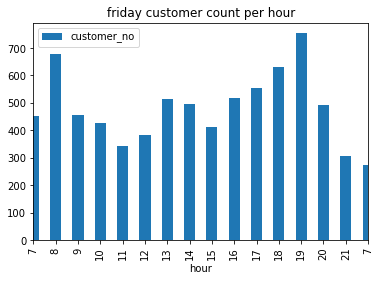

In [168]:
from matplotlib.pyplot import figure

figure(figsize=(100,4), dpi=180)
df_group_two.plot.bar(x="hour",y="customer_no")
plt.xlim(0,15)
plt.title('friday customer count per hour')


/home/mahmood/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


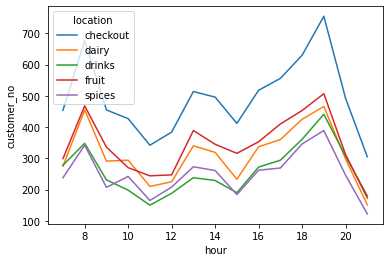

In [157]:
sns.lineplot("hour","customer_no",hue="location",data=df_group_two)

### 3) Display the number of customers at checkout over time

In [181]:
df_checkout= df_group_two[df_group_two.location == "checkout"]
df_checkout.head()

,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342


<AxesSubplot:xlabel='hour', ylabel='customer_no'>

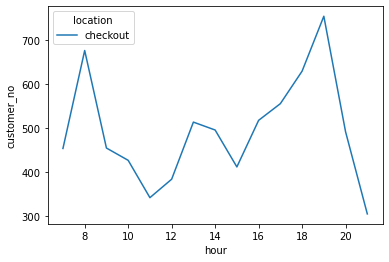

In [182]:
sns.lineplot(x="hour",y="customer_no",hue="location",data=df_checkout)

### 4) Calculate the time each customer spent in the market